# 04 분류
### Context
#### Classification
+ Logistic Regression
+ SVM
+ Decision Tree
+ Random Forest

#### Evaluation
+ Accuracy
+ Confusion Matrix
+ ROC-AUC

In [1]:
import os
from os.path import join
import copy
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import sklearn

import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
iris= load_iris()

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
data = iris.data
label = iris.target
columns = iris.feature_names

In [6]:
data = pd.DataFrame(data, columns = columns)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
data.shape

(150, 4)

In [8]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, label,
                                                    test_size=0.2, shuffle=True, stratify=label, random_state=2019)#라벨이 순서대로라

# Stratified sampling은 Random sampling과는 다른 샘플링 방식이다.
# Stratified sampling는 훈련데이터를 나눌 때 무작위로 샘플링을 하되, original dataset의 클래스 비율이 train, test set에서도
# 동일하게 유지되는 것을 보장한다는 점이 Random sampling과의 차이점이다.
# 위 CONDITIONS 섹션에서도 말했듯이, 분류문제에서는 이 비율이 유지되는 것이 굉장히 중요한데,
# original dataset에서 특정 클래스 비율이 불균형한 경우 stratify 매개변수에 타깃 데이터를 지정하여
# 호출하면 (어떠한 통계적 기법을 통해서) 이 비율이 유지될 수 있도록 샘플링한다.

1) 모델 불러오기 및 정의하기

In [11]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
#파라미터에서 패널티 L2 릿지, L1라소, 설명추가 C값은 원래SVM개념인데 사이킷런에서는 얼마나 오차를 감수할건지 비슷하게 만들어 놓은것
#기본값으로 사용

2) 모델 학습하기 (훈련 데이터)

In [12]:
lr.fit(x_train, y_train)

LogisticRegression()

3) 결과 예측하기 (테스트 데이터)

In [13]:
y_pred = lr.predict(x_test)#f레이블을 반환

In [14]:
lr.predict_proba(x_test) * 100 # 퍼센트로곱해도 보기 힘드네..
#1번째 클래스일 확률 76프로 2번째는 91프로 3번째는 79프로 1이 넘긴함 따로 확률구하기 때문 로지스틱 3개썻기때문

array([[7.63263457e+00, 9.15705215e+01, 7.96843942e-01],
       [2.17976195e+00, 9.54837862e+01, 2.33645189e+00],
       [2.11833089e-03, 4.36907218e+00, 9.56288095e+01],
       [5.61226607e-03, 9.28763748e+00, 9.07067503e+01],
       [1.30284990e-05, 6.07854561e-01, 9.93921324e+01],
       [9.84349022e+01, 1.56509503e+00, 2.72800440e-06],
       [9.76539950e+01, 2.34599707e+00, 7.97821456e-06],
       [9.72380879e+01, 2.76190629e+00, 5.81034638e-06],
       [9.68494426e+01, 3.15054216e+00, 1.52404978e-05],
       [9.83045533e+01, 1.69544189e+00, 4.84753529e-06],
       [2.19357995e+00, 9.26514882e+01, 5.15493189e+00],
       [9.85566732e+01, 1.44332365e+00, 3.15933405e-06],
       [1.68764116e-05, 4.42766663e-01, 9.95572165e+01],
       [3.85386607e-01, 8.77095616e+01, 1.19050518e+01],
       [9.11825304e-02, 3.95053050e+01, 6.04035125e+01],
       [7.63285657e-04, 2.16879400e+00, 9.78304427e+01],
       [9.61441333e+01, 3.85585051e+00, 1.62261642e-05],
       [1.15886229e+00, 7.56662

4) 결과 살펴보기
일반적으로 분류에서는 Accuracy, 정확도를 평가 척도로 사용합니다.

In [15]:
from sklearn.metrics import accuracy_score #precision_score, roc_auc_score 등등 이있음

In [16]:
print('로지스틱 회귀, 정확도 : {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))

로지스틱 회귀, 정확도 : 96.67%


#### 로지스틱 회귀 모델의 계수 w, 절편 b 살펴보기
어떤 변수에 얼마 만큼의 가중치가 할당되고, 절편 값은 얼마나 할당되는지 살펴볼 수 있습니다.<br>
3개의 멀티 클래스 분류이므로 One-vs-Rest, 3개의 회귀식을 가지고 있습니다.

In [17]:
print('로지스틱 회귀, 계수(w) : {}, 절편(b) : {}'.format(lr.coef_, lr.intercept_))
#로지스틱도 선형회귀므로 계수를 볼수 있음
#클래스가 3개 이므로 변수4개 0번 클래스 1번클래스 변수 4개 모델.. 2번클래스. 변수 4개 의 세개의 로지스틱을 만듦
#이 계수를 기준으로 feature importence를 확인할 수있음 트리모델도 확인가능함
# 0번 클래스 변수 4개짜리 회귀모델 [[-0.43317579  0.82135217 -2.3940387  -0.96776787]
# 1번 클래스 변수 4개짜리 회귀모델 [ 0.49039202 -0.29955373 -0.15924458 -0.91532044]
# 2번 클래스 변수 4개짜리 회귀모델 [-0.05721622 -0.52179843  2.55328327  1.88308831]]
# 절편(b) : [  9.79503736   2.02943392 -11.82447127]
#계수를 통해 feature importance를 보기도함


로지스틱 회귀, 계수(w) : [[-0.43317648  0.82136848 -2.39403446 -0.96777504]
 [ 0.49039201 -0.29957216 -0.15925428 -0.91530286]
 [-0.05721553 -0.52179632  2.55328873  1.8830779 ]], 절편(b) : [  9.79499216   2.02950448 -11.82449665]


2. Support Vector Machine
Support Vector Machine(SVM, 서포트 벡터 머신)는 주어진 데이터를 바탕으로하여 두 카테고리(이진 분류의 경우) 사이의 간격(Margin, 마진)을 최대화하는 데이터 포인트(Support Vector, 서포트 벡터)를 찾아내고,
그 서포트 벡터에 수직인 경계를 통해 데이터를 분류하는 알고리즘입니다

1) 모델 불러오기 및 정의하기

In [18]:
from sklearn.svm import SVC
svc = SVC()

2) 모델 학습하기 (훈련 데이터)

In [19]:
svc.fit(x_train, y_train)

SVC()

3) 결과 예측하기 (테스트 데이터)

In [20]:
y_pred = svc.predict(x_test)

4) 결과 살펴보기
일반적으로 분류에서는 Accuracy, 정확도를 평가 척도로 사용합니다.

In [21]:
print('서포트 벡터 머신, 정확도 : {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))

서포트 벡터 머신, 정확도 : 96.67%


Decision Tree : 특정기준으로 자르는것 불순도나 엔트로피로 자름
이전의 회귀 수업에서 결정 트리에 대해 간단하게 살펴보았었습니다.
결정 트리는 입력 변수를 특정한 기준으로 잘라(분기) 트리 형태의 구조로 분류를 하는 모델입니다

1) 모델 불러오기 및 정의하기

In [22]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5)

2) 모델 학습하기 (훈련 데이터)

In [23]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

3) 결과 예측하기 (테스트 데이터)

In [24]:
y_pred = dt.predict(x_test)

4) 결과 살펴보기
일반적으로 분류에서는 Accuracy, 정확도를 평가 척도로 사용합니다.

In [25]:
print('결정 트리, 정확도 : {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))

결정 트리, 정확도 : 96.67%


Feature Importance
트리 기반 모델은 트리를 분기하는 과정에서 어떤 변수가 모델을 생성하는데 중요한지에 대한 변수 중요도를 살펴볼 수 있습니다.

In [26]:
feature_importance = pd.DataFrame(dt.feature_importances_.reshape((1, -1)), columns=columns, index=['feature_importance'])
feature_importance

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
feature_importance,0.0,0.01875,0.588772,0.392478


Random Forest
결정 트리가 나무였다면, 랜덤 포레스트는 숲 입니다. 랜덤 포레스트의 특징은 작은 트리들을 여러개 만들어 합치는 모델입니다.
서로 다른 변수 셋으로 여러 트리를 생성합니다. 여러개의 모델을 합치는 앙상블 기법 중 대표적인 예시입니다.

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=5,)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print('랜덤 포레스트, 정확도 : {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))
feature_importance = pd.DataFrame(rf.feature_importances_.reshape((1, -1)), columns=columns, index=['feature_importance'])
feature_importance

랜덤 포레스트, 정확도 : 96.67%


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
feature_importance,0.098665,0.018984,0.470907,0.411444


In [28]:
rf.score(x_test, y_test)

0.9666666666666667

부스팅 앙상블 모델 학습 파일

Evaluation
1. Accuracy, 정확도

모든 데이터에 대해 클래스 라벨을 얼마나 잘 맞췄는지를 계산
2. Confusion Matrix, 혼동 행렬

정확도로는 분류 모델의 평가가 충분하지 않을 수 있습니다. 예를 들어, 병이 있는 사람을 병이 없다고 판단하는 경우 Risk가 높기 때문에 모델의 목적에 맞게 분류 모델을 평가하여야 합니다. 이때 사용되는 것이 Confusion Matrix 입니다.

- Precision, 정밀도 : TP/(FP+TP), 1이라고 예측한 것 중 실제로 1인 것 : 정밀도가 높다해도 민감도 특이도를 잘 봐야함
- Sensitivity, 민감도 : True Positive rate = Recall = Hit ratio = TP/(TP+FN), 실제로 1인 것 중에 1이라고 예측한 것 : 의료데이터에서 중요함
- Specificity, 특이도 : True Negative rate = TN/(FP+TN), 실제로 0인 것 중에 0이라고 예측한 것


3. ROC Curve, AUC

ROC Curve(Receiver-Operating Characteristic curve)는 민감도와 특이도가 서로 어떤 관계를 가지며 변하는지를 2차원 평면상에 표현한 것 입니다.
ROC Curve가 그려지는 곡선을 의미하고, AUC(Area Under Curve)는 ROC Curve의 면적을 뜻합니다.
AUC 값이 1에 가까울 수록 좋은 모델을 의미합니다.

정확도, 정밀도, 민감도, AUC Score

In [29]:
# 전복데이터 - 정밀도, 민감도, AUC Score는 이진 분류인 경우에 사용할 수 있으므로, 수컷, 암컷 데이터만 학습하여 예측한 점수를 계산
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

In [31]:
abalone_path = join('abalone.txt')
column_path = join('abalone_attributes.txt')

abalone_columns = list()
for l in open(column_path):
    abalone_columns.append(l.strip())

In [74]:
data = pd.read_csv(abalone_path, header=None, names=abalone_columns)
data.head()
data = data[data['Sex'] != 'I']
label = data['Sex'].map(lambda x : 0 if x == 'M' else 1)
label

0       0
1       0
2       1
3       0
6       1
       ..
4172    1
4173    0
4174    0
4175    1
4176    0
Name: Sex, Length: 2835, dtype: int64

In [75]:
del data['Sex']

In [76]:
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2835 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          2835 non-null   float64
 1   Diameter        2835 non-null   float64
 2   Height          2835 non-null   float64
 3   Whole weight    2835 non-null   float64
 4   Shucked weight  2835 non-null   float64
 5   Viscera weight  2835 non-null   float64
 6   Shell weight    2835 non-null   float64
 7   Rings           2835 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 199.3 KB


In [78]:
abalone_columns

['Sex',
 'Length',
 'Diameter',
 'Height',
 'Whole weight',
 'Shucked weight',
 'Viscera weight',
 'Shell weight',
 'Rings']

In [79]:
x_train, x_test, y_train, y_test = train_test_split(data, label, stratify=label, random_state=2019)

In [80]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=5)
rf.fit(x_train, y_train)
y_pred =rf.predict(x_test)

In [81]:
print('Accuracy : {:.3f}'.format(accuracy_score(y_test, y_pred)))
print('Precision : {:.3f}'.format(precision_score(y_test, y_pred)))
print('Recall : {:.3f}'.format(recall_score(y_test, y_pred)))
print('AUC : {:.3f}'.format(roc_auc_score(y_test, y_pred)))

Accuracy : 0.536
Precision : 0.492
Recall : 0.177
AUC : 0.510


In [82]:
from sklearn import tree
import graphviz
import seaborn as sns

In [83]:
df_clf = RandomForestClassifier(n_estimators=3, max_depth = 5)
df_clf.fit(x_train, y_train)
y_pred =df_clf.predict(x_test)

In [84]:
importance_value = df_clf.feature_importances_
importance_value = pd.Series(importance_value, index=x_train.columns)
top10 = importance_value.sort_values(ascending=False)[:10]

Length            0.229395
Height            0.219805
Viscera weight    0.188129
Shucked weight    0.105912
Shell weight      0.093073
Whole weight      0.084349
Diameter          0.057731
Rings             0.021608
dtype: float64


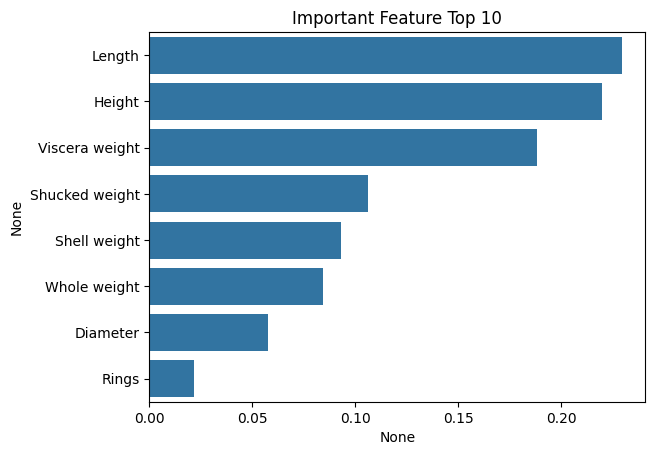

In [85]:
plt.title('Important Feature Top 10')
sns.barplot(x=top10, y= top10.index)
print(top10)

In [86]:
#  전체트리 시각화
for i , tree_in_forest in enumerate(df_clf.estimators_):
    tree_dot = tree_dot = tree.export_graphviz(tree_in_forest, out_file=None,feature_names = data.columns,class_names = ['Man','Woman'], filled=True)
    graph = graphviz.Source(tree_dot, format='png')
    graph.render(filename=f'tree_{i}')

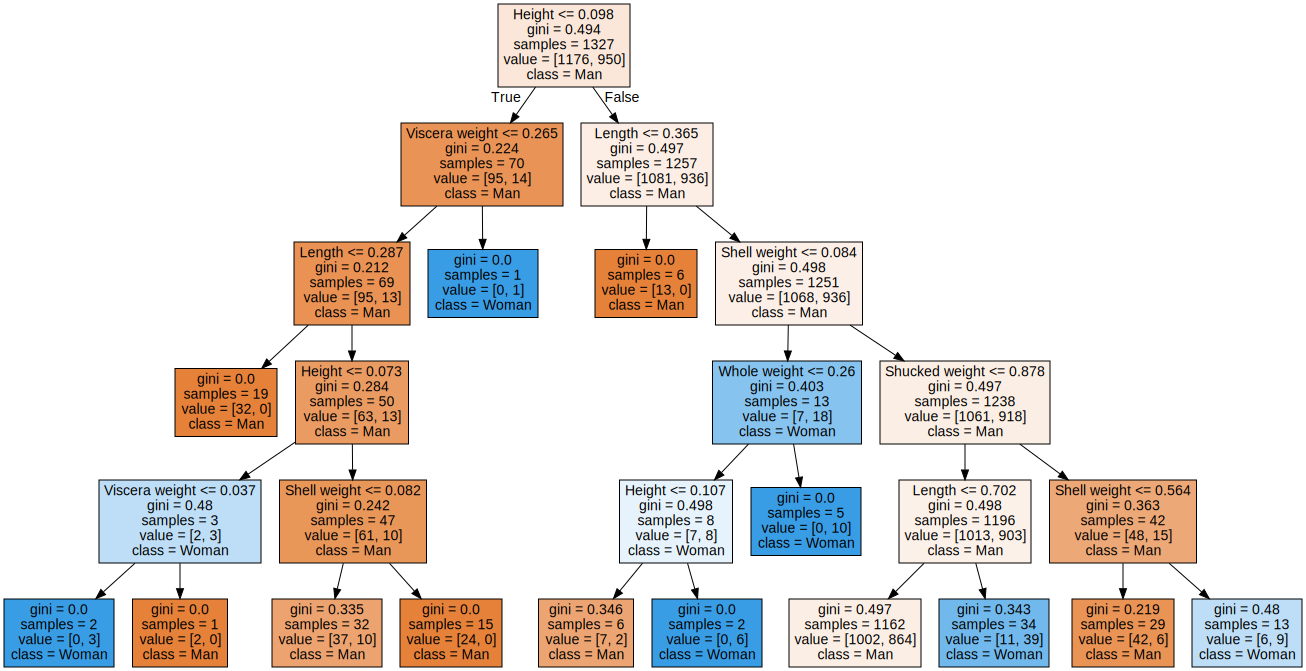

In [87]:
graph

### Reference
- Wikipedia, Classification : https://en.wikipedia.org/wiki/Statistical_classification
- Maximum Likelihood Estimation, 최대 우도 추정 : https://ratsgo.github.io/statistics/2017/09/23/MLE/
- One-vs-Rest : https://datascienceschool.net/view-notebook/7a6b958e9d51451689138cca93a047d8/
- Information Theory 설명 : https://ratsgo.github.io/statistics/2017/09/22/information/
- ROC AUC 설명 : https://adnoctum.tistory.com/121
- Sklearn, iris dataset : http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
- Sklearn, Logistic Regression : https://www.google.com/url?q=http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html&sa=U&ved=0ahUKEwibhIa0-uDhAhVPeXAKHfPhCYQQFggEMAA&client=internal-uds-cse&cx=016639176250731907682:tjtqbvtvij0&usg=AOvVaw2AirAop04TUH9X2S1r9FVd
- Sklearn, SVM : https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
- Sklearn, Decision Tree : https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- Sklearn, Random Forest : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html